In [54]:
from pprint import pprint
from plpy import list_devices, Multimeter_VC655BT

IdentifiedDevices, UnidentifiedDevices = list_devices()
pprint(IdentifiedDevices)
pprint(UnidentifiedDevices)

{'033i': {'Address': 'ASRL/dev/ttyUSB0::INSTR',
          'Manufacturer': 'Voltcraft',
          'SerialNo': '22210770',
          'Type': 'VC655BT'}}
{}


In [55]:
Multimeter_01 = Multimeter_VC655BT(IdentifiedDevices['033i']['Address'])

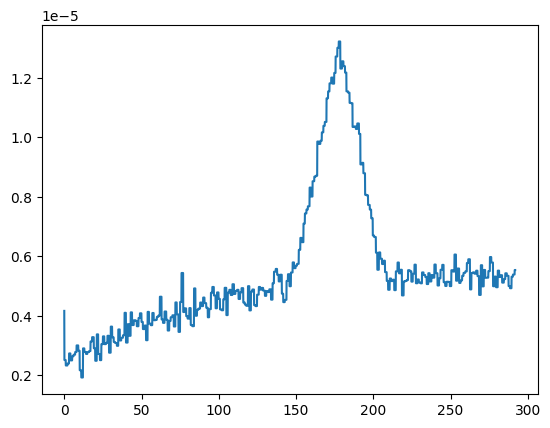

In [72]:
import time 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Voltage = []
Time = []
start = time.time()

with open('data21.csv', 'w', encoding='utf-8', buffering=1) as file:
    file.write('x,y\n')
    while True:
        file.write('{},{}\n'.format(time.time() - start, Multimeter_01.acquire()))
    
        
file = pd.read_csv('data21.csv', sep=',')
plt.plot(file['x'], file['y'])
plt.show()

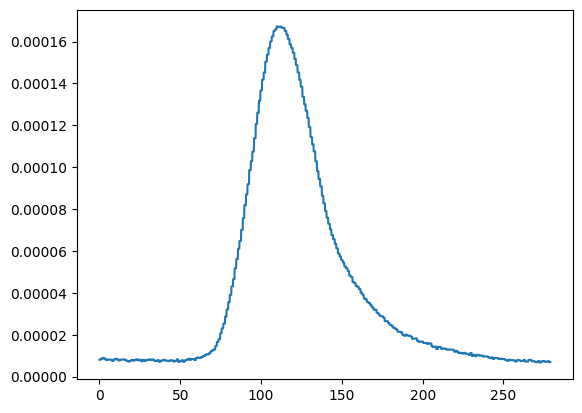

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

file = pd.read_csv('data7.csv', sep=',')
plt.plot(file['x'], file['y'])
#plt.ylim(-0.7, -0.6)
plt.show()

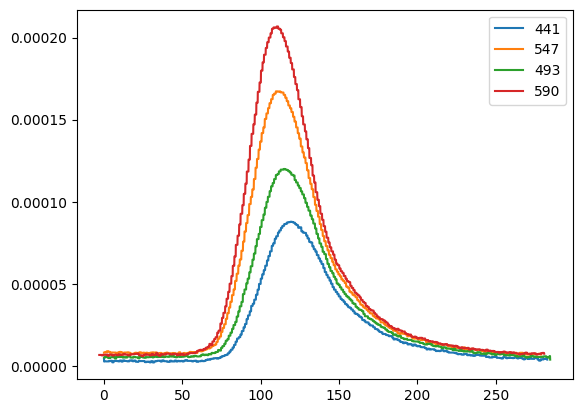

In [73]:
import matplotlib.pyplot as plt
import pandas as pd

def reverse_list(l):
    ret = []
    for i in range(len(l)):
        ret.append(l[len(l)-i-1])
    return ret

def offset(l:list, move:int):
    ret = []
    for i in range(len(l)):
        ret.append(l[i] + move)
    return ret

file = pd.read_csv('data5.csv', sep=',')
file1 = pd.read_csv('data7.csv', sep=',')
file2 = pd.read_csv('data6.csv', sep=',')
file3 = pd.read_csv('data8.csv', sep=',')
#file4 = pd.read_csv('data20.csv', sep=',')

plt.plot(file['x'], file['y'], label='441')
plt.plot(file1['x'], file1['y'], label='547')
plt.plot(reverse_list(file2['x']), file2['y'], label='493')
plt.plot(offset(reverse_list(file3['x']), -3), file3['y'], label='590')
#plt.plot(reverse_list(file4['x']), file4['y'])
#plt.ylim(0.0000005, 0.00005)
plt.legend()
plt.show()